In [1]:
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
import sys
import numpy as np
import time
import matplotlib.pyplot as plt

#+____IMPORT FESOM RELATET ROUTINES____________________________________________+
from set_inputarray  import *
from sub_fesom_mesh  import * 
from sub_fesom_data  import * 
from sub_fesom_plot  import *
from colormap_c2c    import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** LOAD FVSOM MESH ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# for more options look in set_inputarray.py
inputarray             = set_inputarray()
inputarray['mesh_id' ] = 'COREv2'
inputarray['mesh_dir'] = '/scratch/users/pscholz/AWI_DATA/mesh_fesom2.0/mesh_CORE2_final_fvom/'
try:
	mesh
except NameError:
	mesh = fesom_init_mesh(inputarray)
else:
	print " --> ___FOUND FESOM MESH --> will use it!___________________________"


___LOAD FESOM MESH_________________________________________
 --> read grid files
     > nod2d.out
     > elem2d.out
     > aux3d.out
     > nlvls.out
     > elvls.out
 --> rotate mesh rot2geo
 --> remove cyclic boundary
 --> calc landmask contourline
 --> rotate mesh geo2rot



     -----+-----------------------------------+------------
     Year |               MON                 |
     -----+-----------------------------------+------------
     1948 | annual |  --> t=0.10s

___PLOT 2D DATA____________________________________________


<IPython.core.display.Javascript object>


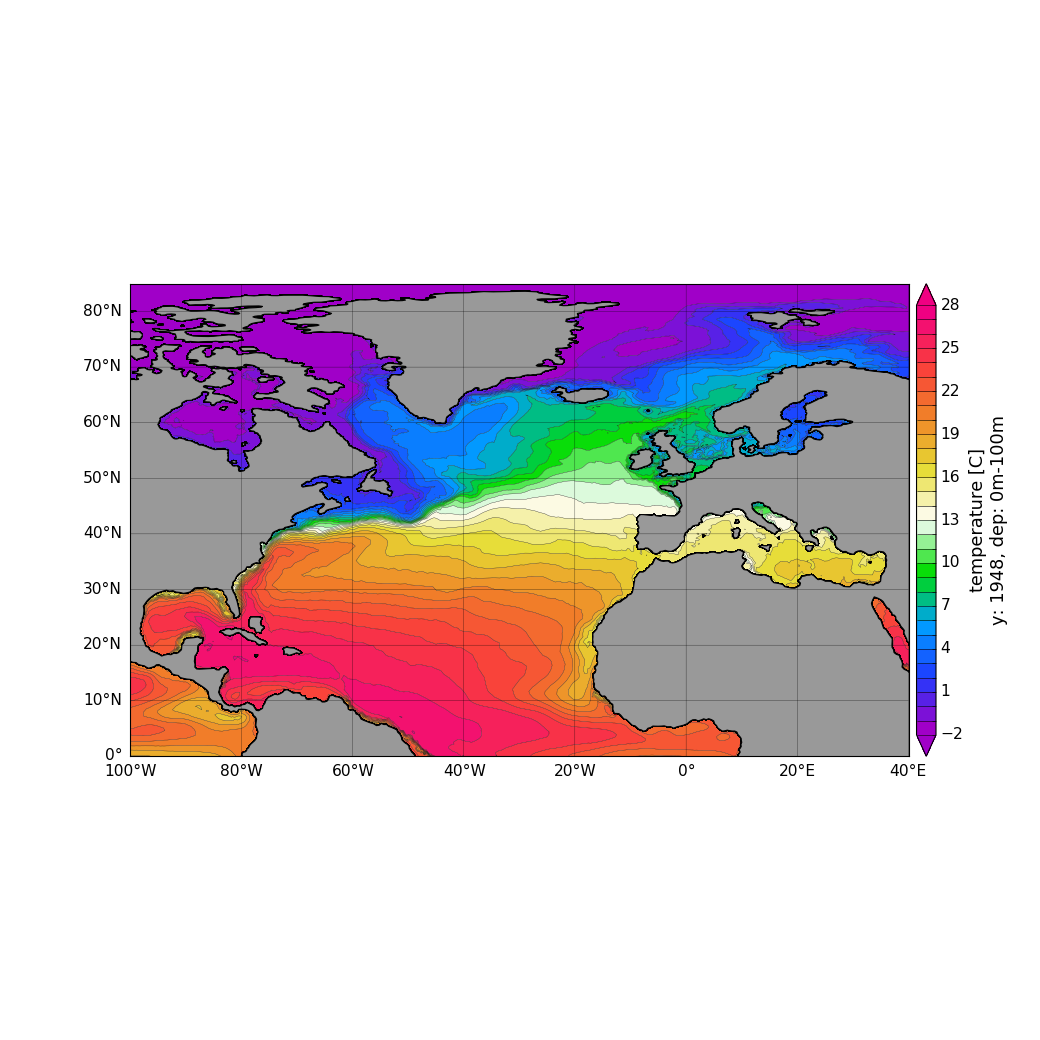

[cmin,cmax,cref] = [-1.80555880258, 27.2525265298, 13.0]
('clevel = ', array([ -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
         9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
        20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.]))


In [8]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** SET INPUT PARAMETER ***                         |
#|                                                                             |
#+_____________________________________________________________________________+

#+_____________________________________________________________________________+
# for more options look in set_inputarray.py
inputarray               = set_inputarray()
inputarray['data_id'   ] = 'fesom'
inputarray['data_dir1' ] = '/scratch/users/pscholz/AWI_DATA/result_fvom_test/withPC-1/'    

inputarray['which_mask'] = 'fesom' # 'fesom', 'bluemarble', 'etopo'
#inputarray['save_fig'] = False

# set plot box for projections (default: [-180,180,-90,90])
inputarray['which_box' ] = [-100,40,0,85]
# set projection variable --> the lon/lat projection plot ranges are set via 
# inputarray['which_box'] = [lonmin,lonmax,latmin,latmax]
inputarray['proj'      ] = 'cyl' # 'ortho', 'cyl', 'npstere' , 'spstere'

#+_____________________________________________________________________________+
# setup variable name, runid and data path
data 			= fesom_init_data(inputarray) # init fesom2.0 data object

# name of variable or in case of vector data norm_uv, vec_uv
data.var 		= 'temp' 

#data.crange     = []
#data.crange     = [0.0,0.2,0.1] # [cmin, cmax, cref]
#data.cmap       ='wbgyr'

#+_____________________________________________________________________________+
# select year to average over [yr_start,yr_end]
data.year		= [1948,1948]

# selct month to average over
data.month		= [1,2,3,4,5,6,7,8,9,10,11,12]
#data.month		= [1,2,12]
#data.month		= [9]

# select interpolate depth layers to average over
data.depth		= [0,10,20,30,40,50,75,100]
#data.depth		= [100]

#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** LOAD FVSOM DATA ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
#_______________________________________________________________________________
# plot topography
if data.var=='depth':
	data.value 	= -mesh.nodes_2d_z
	data.sname 	= 'depth'
	data.lname 	= 'Depth'
	data.unit 	= 'm'
	data.levels = np.arange(0,np.max(data.value),200)# set resolution levels
	#data.cmap 	= 'blue2red'
	#data.cmap 	= 'cmocean.cm.balance'
	data.cmap 	= 'wbgyr'
#_______________________________________________________________________________
# plot triangle resolution interpolated to node
elif data.var=='triresol':
	mesh = fesom_calc_triresol(mesh)
	data.value 	= mesh.nodes_2d_resol
	data.sname 	= 'triresol'
	data.lname 	= 'Resolution'
	data.unit 	= 'km'
	data.levels = np.arange(0,np.max(data.value),10)# set resolution levels
	#data.cmap 	= 'blue2red'
	#data.cmap 	= 'cmocean.cm.balance'
	data.cmap 	= 'odv'
#_______________________________________________________________________________
# plot triangle area interpolated to node
elif data.var=='triarea':
	mesh = fesom_calc_triarea(mesh)
	data.value 	= mesh.nodes_2d_area
	data.sname 	= 'triarea'
	data.lname 	= 'Area'
	data.unit 	= 'km^2'
	data.levels = np.arange(0,np.max(data.value),10)# set resolution levels
	#data.cmap 	= 'blue2red'
	data.cmap 	= 'cmocean.cm.balance'
	#data.cmap 	= 'odv'
#_______________________________________________________________________________
# load all other 2d and 3d variables
else:
	fesom_load_data_horiz(mesh,data)
	
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** PLOT FVSOM DATA ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# plot 2d and 2dvec data
if len(data.value2)==0:
	test=fesom_plot2d_data(mesh,data)
else:
	fesom_plot2dvec_data(mesh,data)
    
#fesom_plot3d_earth(mesh,data)
###fesom_plot2d_geomesh(mesh)
###fesom_plot2d_rotmesh(mesh)